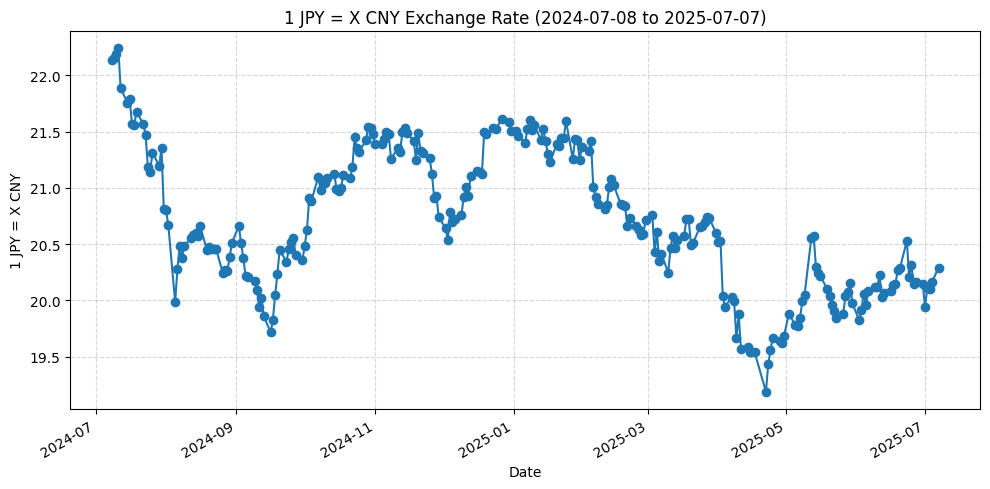

汇率数据已保存到 CNY_JPY_to_RMB_exchange_rate.csv


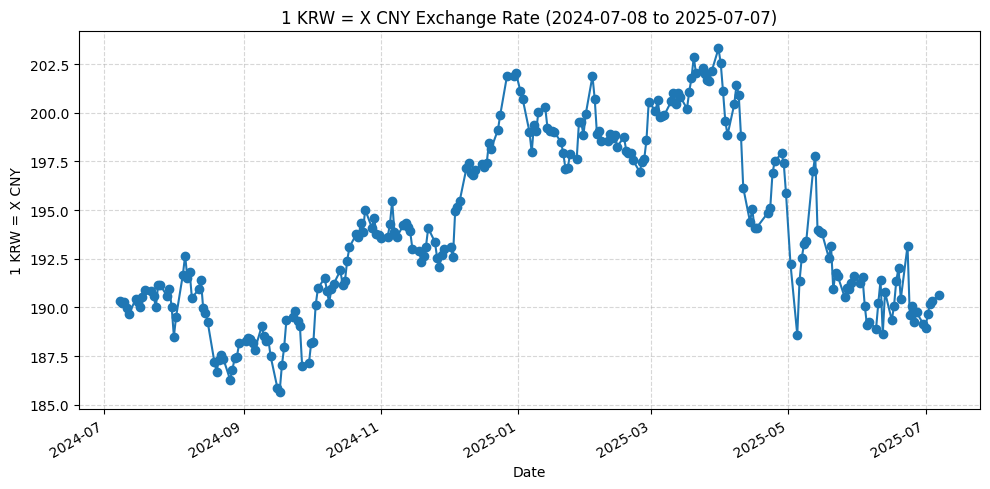

汇率数据已保存到 CNY_KRW_to_RMB_exchange_rate.csv


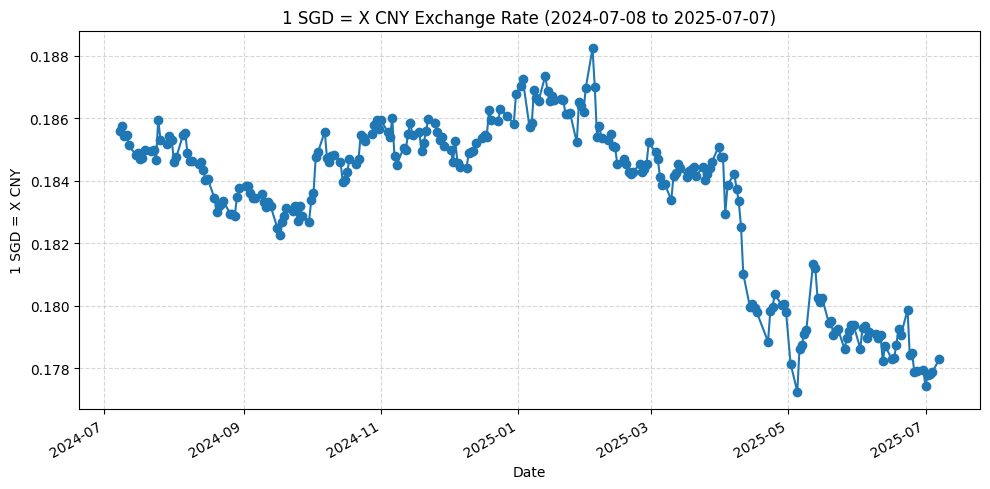

汇率数据已保存到 CNY_SGD_to_RMB_exchange_rate.csv


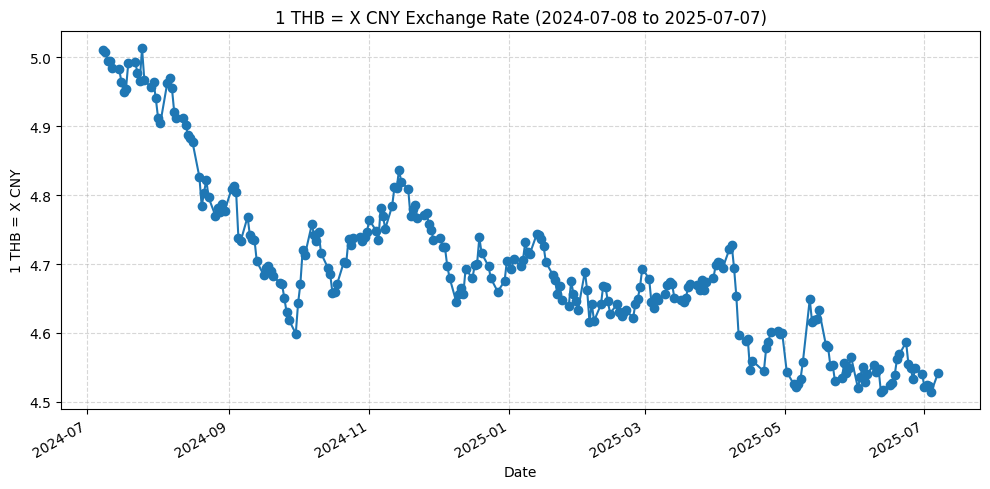

汇率数据已保存到 CNY_THB_to_RMB_exchange_rate.csv


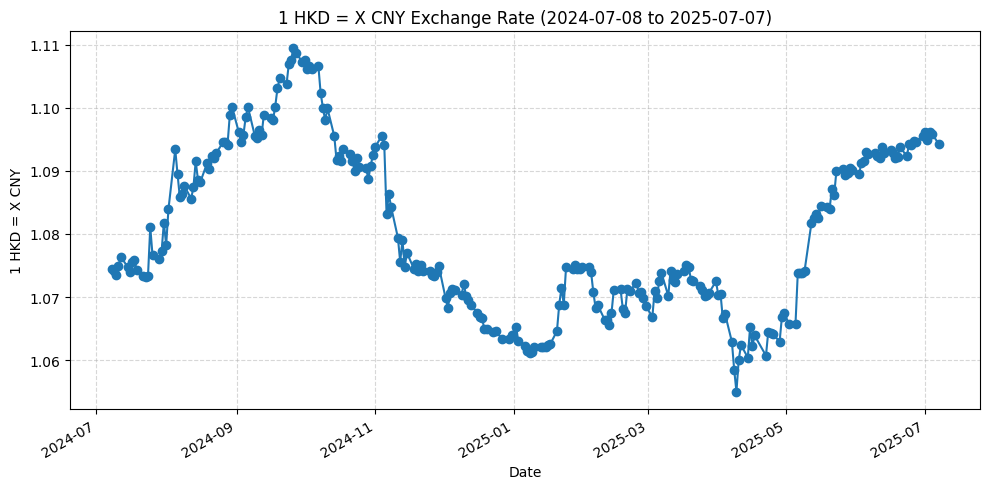

汇率数据已保存到 CNY_HKD_to_RMB_exchange_rate.csv


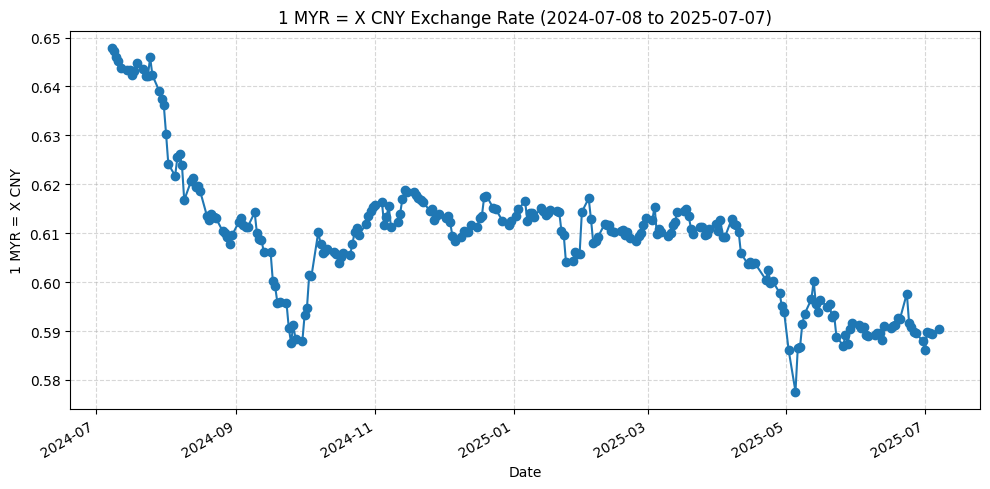

汇率数据已保存到 CNY_MYR_to_RMB_exchange_rate.csv


In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def fetch_timeseries_frankfurter(base: str, symbols: list, start: str, end: str) -> pd.DataFrame:
    """
    使用 Frankfurter API 获取历史汇率时间序列，并返回 DataFrame。
    行索引为日期，列为各目标货币的汇率（1 base = X 目标币）。
    无需 API Key。
    """
    url = f"https://api.frankfurter.app/{start}..{end}"
    params = {
        "from": base,
        "to": ",".join(symbols)
    }
    resp = requests.get(url, params=params, timeout=10)
    resp.raise_for_status()
    data = resp.json()
    rates = data.get("rates", {})
    if not rates:
        raise RuntimeError(f"No rates returned: {data}")
    df = pd.DataFrame.from_dict(rates, orient="index")
    df.index = pd.to_datetime(df.index)
    df.sort_index(inplace=True)
    return df

if __name__ == "__main__":
    # 参数设置
    base_currency = "CNY"          # 基准货币：人民币
    targets = ["JPY", "KRW", "SGD", "THB", "HKD", "MYR"]  # 多个目标货币
    start_date = "2024-07-08"      # 起始日期
    end_date = "2025-07-07"        # 结束日期

    # 1. 获取历史汇率数据并处理每个目标货币
    for target in targets:
        # 获取单个目标货币的历史汇率数据
        df_rates = fetch_timeseries_frankfurter(base_currency, [target], start_date, end_date)

        # 2. 绘制折线图
        plt.figure(figsize=(10, 5))
        plt.plot(df_rates.index, df_rates[target], marker="o", linestyle="-")
        plt.title(f"1 {target} = X {base_currency} Exchange Rate ({start_date} to {end_date})")
        plt.xlabel("Date")
        plt.ylabel(f"1 {target} = X {base_currency}")
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.gcf().autofmt_xdate()
        plt.tight_layout()
        #plt.savefig(f"{base_currency}_{target}_to_RMB_exchange_rate.png")  # 保存图表
        
        plt.show()
        plt.close()

        # 3. 打印数据并输出到 CSV 文件
        # 汇率转换：1 / 原汇率，得到每个目标货币等于多少人民币
        df_rates.rename(columns={target: base_currency}, inplace=True)
        df_rates[base_currency] = 1 / df_rates[base_currency]  # 转换为目标币 = 1 人民币
        #df_rates.sort_index(ascending=False, inplace=True)  # 倒序排列
        df_rates.index = df_rates.index.strftime('%Y/%m/%d')  # 格式化日期索引

        # 输出到不同文件
        df_rates.to_csv(f"{base_currency}_{target}_to_exchange_rate.csv", header=True, index_label="Date")
        print(f"汇率数据已保存到 {base_currency}_{target}_to_RMB_exchange_rate.csv")


In [14]:
import pandas as pd
import re

# 提取数据的函数
def extract_exchange_rate_from_js(js_code: str):
    # 使用正则表达式提取日期和汇率
    pattern = r"new Date\('(.*?)'\),(\d+\.\d+)"
    matches = re.findall(pattern, js_code)
    
    # 如果提取到数据
    if matches:
        data = []
        for match in matches:
            date_str = match[0]
            rate = float(match[1])
            
            # 将日期转换为标准格式
            date = pd.to_datetime(date_str).strftime('%Y-%m-%d')
            data.append([date, rate])
        
        # 转换为DataFrame
        df = pd.DataFrame(data, columns=['Date', 'Exchange Rate'])
        return df
    else:
        print("未能提取到数据！")
        return None

# 提供的JavaScript数据，通常是从网页提取的
js_code = """
[[new Date('2024-07-08'), 1.5524], [new Date('2024-07-09'), 1.5536], 
[new Date('2024-07-10'), 1.5568], [new Date('2024-07-11'), 1.5576],
[new Date('2024-07-12'), 1.5616], [new Date('2024-07-13'), 1.5625]]
"""

# 提取汇率数据并保存为CSV
df_rates = extract_exchange_rate_from_js(js_code)
if df_rates is not None:
    df_rates.to_csv("exchange_rates.csv", index=False)
    print("汇率数据已保存到 exchange_rates.csv")


未能提取到数据！
